In [31]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

In [32]:
# Get stock tickers
tickers = ['PLTR', 'ATVI', 'NIO', 'NEGG', 'AAPL', 'LOVE', 'JYNT', 'CELH', 'AMD', 'SOFI']

In [33]:
# Get the adjusted closing price of the stocks
df = yf.download(tickers, period='max')
prices = df['Adj Close']
prices.tail()

[*********************100%***********************]  10 of 10 completed


,AAPL,AMD,ATVI,CELH,JYNT,LOVE,NEGG,NIO,PLTR,SOFI
Date,,,,,,,,,,
2021-10-04,139.139999,100.339996,77.180000,90.620003,91.820000,65.800003,13.22,33.400002,23.170000,16.090000
2021-10-05,141.110001,101.809998,76.800003,94.919998,95.080002,70.809998,13.77,33.869999,23.209999,16.250000
2021-10-06,142.000000,103.639999,77.290001,94.459999,96.419998,72.150002,13.87,33.660000,23.580000,16.620001
2021-10-07,143.289993,106.449997,77.360001,97.620003,85.529999,71.320000,14.19,35.990002,23.730000,16.400000
2021-10-08,142.899994,105.059998,77.610001,94.099998,80.099998,71.830002,13.63,35.830002,23.500000,16.209999


In [34]:
from pypfopt import expected_returns
from pypfopt import plotting

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AAPL,AMD,ATVI,CELH,JYNT,LOVE,NEGG,NIO,PLTR,SOFI
Date,,,,,,,,,,
2021-10-04,-0.024606,-0.020595,-0.017191,-0.037902,-0.042744,-0.034766,-0.028655,-0.055964,-0.047678,-0.021885
2021-10-05,0.014158,0.014650,-0.004924,0.047451,0.035504,0.076140,0.041604,0.014072,0.001726,0.009944
2021-10-06,0.006307,0.017975,0.006380,-0.004846,0.014093,0.018924,0.007262,-0.006200,0.015941,0.022769
2021-10-07,0.009084,0.027113,0.000906,0.033453,-0.112943,-0.011504,0.023071,0.069222,0.006361,-0.013237
2021-10-08,-0.002722,-0.013058,0.003232,-0.036058,-0.063487,0.007151,-0.039464,-0.004446,-0.009692,-0.011585


In [35]:
from pypfopt import HRPOpt

In [36]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.19637),
             ('AMD', 0.11301),
             ('ATVI', 0.23409),
             ('CELH', 0.03185),
             ('JYNT', 0.15539),
             ('LOVE', 0.06455),
             ('NEGG', 0.04023),
             ('NIO', 0.04321),
             ('PLTR', 0.0679),
             ('SOFI', 0.0534)])

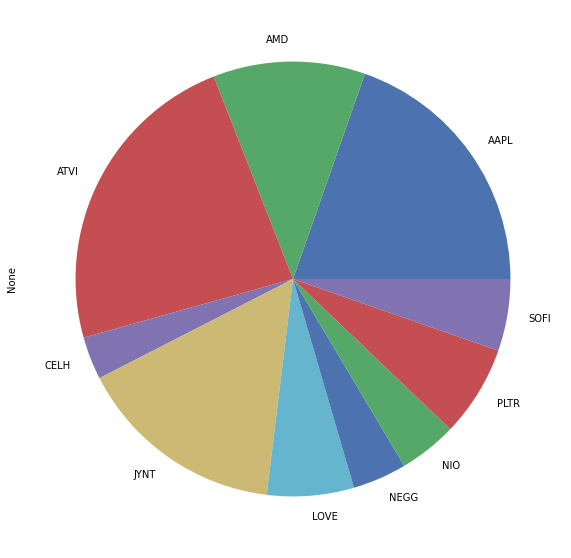

In [37]:
pd.Series(weights).plot.pie();

In [38]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 50.5%
Annual volatility: 31.2%
Sharpe Ratio: 1.55


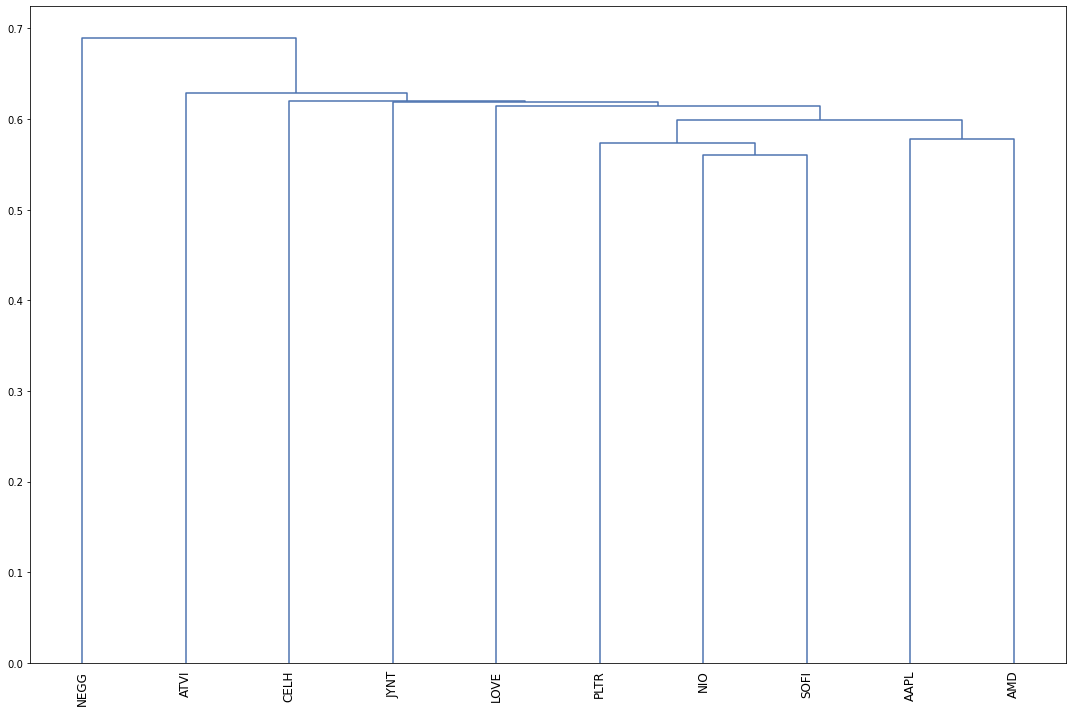

In [39]:
plotting.plot_dendrogram(hrp);

In [40]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1]
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=2000)
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
alloc

Leftover: $1.28


{'AAPL': 3,
 'AMD': 2,
 'ATVI': 6,
 'CELH': 1,
 'JYNT': 4,
 'LOVE': 1,
 'NEGG': 6,
 'NIO': 2,
 'PLTR': 6,
 'SOFI': 7}